In [1]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6
rcParams.update({'figure.max_open_warning': 0, 'font.size': 14, 'axes.titlesize': 14,
                 'axes.labelsize': 14, 'axes.grid':True, 'xtick.direction': 'in', 'ytick.direction': 'in',
                 'ytick.right': True, 'xtick.top':True, 'ytick.major.size': 10, 'xtick.major.size': 10,
                 'legend.fancybox': True, 'legend.markerscale': 0.8, 'legend.handlelength': 5.0})

#from cycler import cycler
mpl.rcParams['grid.linestyle'] = '-.'
#rcParams.keys() 
#plt.style.use('dark_background')
#print(plt.style.available)

In [3]:
pkl_file = open('../2020-05-27_09-07-44.pkl.gz', 'rb')
mydata = pickle.load(pkl_file)
mydata.keys()

dict_keys(['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7'])

In [4]:
print(mydata['Ch4']) 
data=mydata['Ch4']

[[1575 1572 1574 ... 1570 1580 1576]
 [1574 1591 1577 ... 1560 1576 1591]
 [1590 1563 1583 ... 1577 1576 1577]
 ...
 [1585 1581 1577 ... 1571 1579 1580]
 [1569 1584 1581 ... 1590 1582 1576]
 [1572 1582 1578 ... 1572 1579 1572]]


In [5]:
data.shape

(10000, 2000)

In [6]:
x = data[3,1700:2000]
x.shape

(300,)

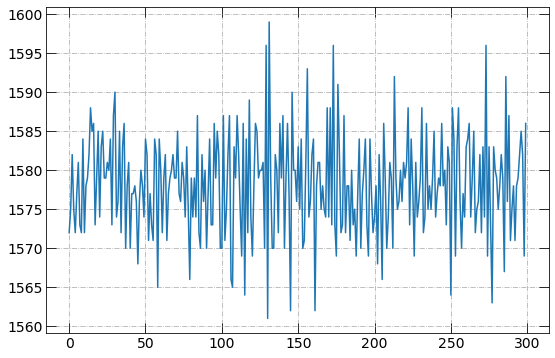

In [7]:
plt.plot(x)
plt.show()


In [8]:
y = data[:,1]
y

array([1572, 1591, 1563, ..., 1581, 1584, 1582])

ValueError: x and y must be the same size

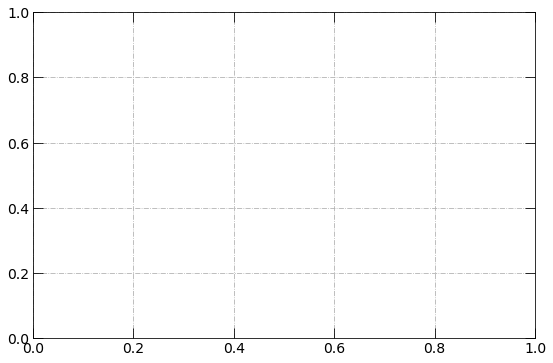

In [9]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


points = data[:,2:4]
# color is the length of each vector in `points`
color = np.sqrt((points**2).sum(axis = 1))/np.sqrt(2.0)
rgb = plt.get_cmap('jet')(color)
ax.scatter(x, y, color = rgb)
plt.show()


In [ ]:
y.shape

In [ ]:
a = np.random.randn(1000)
b = np.random.randn(1000)

a_ma = np.ma.masked_where(a > 0, a)
b_ma = np.ma.masked_where(b < 0, b)

bins = np.arange(-3,3.25,0.25)

fig, ax = plt.subplots(1,3, figsize=(10,3), subplot_kw={'aspect': 1})

hist, xbins, ybins, im = ax[0].hist2d(a_ma,b_ma, bins=bins, normed=True)

hist, xbins, ybins = np.histogram2d(a_ma,b_ma, bins=bins, normed=True)
extent = [xbins.min(),xbins.max(),ybins.min(),ybins.max()]

im = ax[1].imshow(hist.T, interpolation='none', origin='lower', extent=extent)
im = ax[2].imshow(np.ma.masked_where(hist == 0, hist).T, interpolation='none', origin='lower', extent=extent)

ax[0].set_title('mpl')
ax[1].set_title('numpy')
ax[2].set_title('numpy masked')

In [ ]:
a.shape
b.shape

In [16]:
import pandas as pd
import seaborn as sns
%matplotlib inline
df = pd.read_csv("Dope5_ext_post_16-2020-05-27_09-07-44.csv") 

/home/furkan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
df.tail()

,Event,Header,PacketLength,TriggerType,StatusFlags,FlagPileup,FlagPolarity,FlagOffset,FlagCfdValid,HeaderType,...,IntTimestamp3,WaveformWords,Info.max,Info.min,Info.fracTimestamp,Info.intEnergy,Info.intEnergyB,Info.mean,Info.stdDev,Unnamed: 36
99996,99996,0XAAAAAAAA,1012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33947.0,2000.0,1550.0,1525.0,-16000.000000,2871.966667,2.5,1537.5880,3.519695,NaN
99997,99997,0XAAAAAAAA,1012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33947.0,2000.0,1598.0,1529.0,-1420.765027,2880.520000,5.5,1540.3740,4.212259,NaN
99998,99998,0XAAAAAAAA,1012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33947.0,2000.0,1562.0,1531.0,27916.666667,2887.753333,1.5,1546.4075,4.114905,NaN
99999,99999,0XAAAAAAAA,1012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33947.0,2000.0,1566.0,1514.0,416111.111111,2839.260000,-20.0,1529.5350,7.956430,NaN
100000,FILE END,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


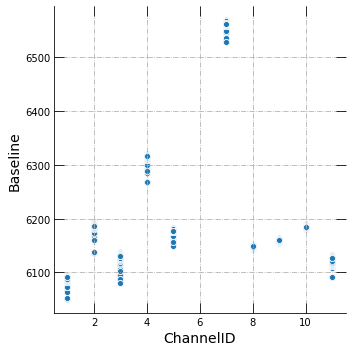

In [36]:
sns.relplot(x= 'ChannelID' ,y='Baseline',
            data= df,)

/home/furkan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/furkan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


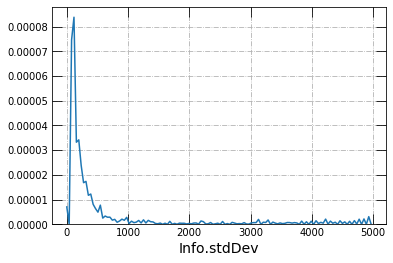

In [46]:
sns.distplot(df['Info.stdDev'], kde = True, hist = False)